# DAV 6150 Module 7 Assignment

## Submitted by 

Brunda Anantha

Bhavya Kurupa Nagaraj

# 1. Introduction

The data set is comprised of more than 14,000 observations of 1 response/dependent variable (which
indicates whether or not the new insurance product was purchased) and 14 explanatory/independent
variables.

- **Step 1: Data Loading**

Our journey begins with the loading of the provided dataset, "M7_Data.csv," into a Pandas dataframe from our GitHub repository. This initial step is crucial for preparing our data and setting the stage for further analysis.

- **Step 2: Data Read**

We'll create a Jupyter Notebook and use Python code to read the dataset from our GitHub repository, loading it into a Pandas dataframe for further analysis.


- **Step 3: Exploratory Data Analysis (EDA)**

In this step, we will explore the dataset to understand its structure, identify potential issues, and gain insights into the data. EDA will involve summary statistics, visualizations, and identifying any missing or inconsistent data.


- **Step 4: Data Preparation**

After understanding the data, we will address any data integrity and usability issues identified during EDA. This includes data cleaning, handling missing values, and feature engineering to create relevant attributes for our regression models.

- **Step 5: Prepped Data Review**

We will re-run EDA on the adjusted variables to evaluate the impact of our data preparation on the dataset. This step will ensure that our data is now in a form suitable for modeling.



# 2. Data Aquiring

In this assignment, our starting point is the retrieval of our dataset, which is conveniently hosted on a dedicated GitHub repository. The dataset is stored in a CSV file named "M7_Data.csv," and our first task is to load this data into a Pandas dataframe. This initial step is crucial as it provides the foundation for our subsequent exploration and analysis.

## 2.1 Importing Libraries

In the following code, we are importing several essential libraries to support our data analysis and visualization tasks. The libraries include pandas for efficient tabular data handling, plotly.express and matplotlib.pyplot for creating visualizations, seaborn for statistical visualizations, and numpy for numerical array operations. These libraries provide us with the necessary tools and functionalities to effectively analyze and visualize data.

In [1]:
# Importing necessary libraries for data manipulation and visualization

# Pandas for working with tabular data
import pandas as pd

# Matplotlib.pyplot for static plots
import matplotlib.pyplot as plt

# Seaborn for statistical visualizations
import seaborn as sns

# NumPy for numerical array operations
import numpy as np

# Scikit-learn for machine learning and data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## 2.2 Loading Dataset from Github & Understanding the data

- **Step 1: Uploading the Dataset to GitHub**

Our journey in addressing the regression modeling task commences with a critical step - uploading the dataset to our GitHub repository. The dataset, named "M7_Data.csv," is the cornerstone of our analysis. Ensuring that the dataset is properly uploaded to our GitHub repository in a compatible format, such as CSV, is fundamental for seamless access.

- **Step 2: Obtaining the Raw Data Link**

After successfully uploading the dataset to GitHub, the next crucial task is to obtain the raw link for this dataset. This seemingly ordinary link holds the key to fetching the data directly into our Jupyter Notebook. Its accessibility is paramount as it allows all team members to access the data effortlessly, ensuring that everyone can work with the dataset efficiently.

- **Step 3: Loading Data with Pandas**

Armed with the raw link, we'll transition to our Jupyter Notebook, where the versatile Pandas library is ready to assist. Using the Pandas read_csv() function, we'll orchestrate the process of data retrieval. Our objective is straightforward - to read the dataset directly from the raw GitHub link and create a Pandas DataFrame. This DataFrame will serve as our canvas, ready to absorb and represent the dataset for our subsequent analysis.

With our data now within reach, we're poised to embark on the intriguing journey of regression modeling. In the upcoming sections, we will explore the dataset, prepare the data, select features, and construct regression models. Our aim is to gain insights into the factors influencing customers to whom they offered the new product and information about whether they did or did not sign up for the new product and to identify the best regression model for predicting these outcomes. Let's begin by uploading and loading our dataset, laying the foundation for a comprehensive analysis of regression models.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Brunda08/m7/main/M7_Data.csv")

In [3]:
data.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [4]:
data

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,Y,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,Y,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,Y,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


The dataset contains several columns, and here's a brief overview of the first few rows:

TARGET: This appears to be a binary categorical column, likely indicating a specific outcome or class.

loyalty: A numerical column, possibly indicating some measure of customer loyalty.

ID: A unique identifier for each entry.

age: Age of the individual.

city: City code or identifier.

LOR: A numerical column, the meaning of which isn't immediately clear.

prod_A, prod_B: Possibly indicate products A and B.

type_A, type_B: Likely related to the types of products A and B.

turnover_A, turnover_B: Possibly indicating the turnover related to products A and B.

contract: Some sort of contract identifier or type.

age_P: Another age column, perhaps a different measurement or related to a different entity.

lor_M: Another numerical column with unclear meaning at the moment.

# 3. Break down of Variables

In [5]:
# Extracting the column names from the dataset using the .columns attribute.
column_names = data.columns

# Printing the list of column names to the console.
print(column_names)

Index(['TARGET', 'loyalty', 'ID', 'age', 'city', 'LOR', 'prod_A', 'type_A',
       'type_B', 'prod_B', 'turnover_A', 'turnover_B', 'contract', 'age_P',
       'lor_M'],
      dtype='object')


The dataset consists of the following columns:

ID: This is a unique customer identifier, likely a number or code assigned to each customer in your dataset.

TARGET: This attribute is an indicator of whether the customer bought the new product. It is a binary variable where N typically represents "no" (the customer didn't buy the product) and Y represents "yes" (the customer bought the product).

Loyalty: This attribute represents the loyalty level of the customer, with values ranging from low to high. It's a categorical variable, often encoded as 0, 1, 2, 3, with 0 representing the lowest loyalty level. A value of 99 might indicate unclassified or missing data.

Age: This attribute represents the age of the customer in years. It's a numerical variable, and the age can vary widely among different customers.

City: This attribute likely contains unique codes or identifiers for different cities. It's a categorical variable that may be used to identify the location of each customer.

Age_p: This attribute represents the age of the customer's partner (if applicable) in years. Like "Age," it's a numerical variable.

LOR: This is the length of the customer's relationship with your business or service, typically measured in years. It's a numerical variable.

LOR_m: Similar to "LOR," this attribute represents the length of the customer's relationship, but in months rather than years. It's also a numerical variable.

Prod_A: This attribute is a binary indicator of whether the customer bought Product A. A value of 0 typically means "no," and 1 means "yes."

Type_A: This attribute likely specifies the type or category of Product A that the customer purchased. It's a categorical variable that can provide information about the product type.

Turnover_A: This attribute represents the amount of money spent by the customer on Product A. It's a numerical variable and can provide insights into the customer's spending behavior for this product.

Prod_B: Similar to "Prod_A," this attribute is a binary indicator of whether the customer bought Product B.

Type_B: This attribute specifies the type or category of Product B that the customer purchased. Like "Type_A," it's a categorical variable.

Turnover_B: This attribute represents the amount of money spent by the customer on Product B. It's a numerical variable and can provide insights into the customer's spending behavior for this product.

Contract: This attribute represents the type of contract associated with the customer. 

## 3.1 Data Types

In [6]:
# Using the dtypes attribute to check the data type of each variable in the school dataset.
column_data_types = data.dtypes

# Printing the data types of each variable to the console.
print(column_data_types)


TARGET         object
loyalty         int64
ID              int64
age             int64
city            int64
LOR             int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
turnover_A    float64
turnover_B    float64
contract        int64
age_P           int64
lor_M           int64
dtype: object


TARGET: This variable has an object data type, which typically indicates that it contains text or categorical data. This is somewhat unusual for a variable representing binary (0/1) values. You might want to check the contents of this column to ensure it's properly encoded.

Loyalty: This variable has an int64 data type, which is suitable for representing integer values. It seems to be used for loyalty level.

ID: This variable has an int64 data type, suitable for representing unique identifier values.

Age: This variable also has an int64 data type, suitable for representing integer values, in this case, the age of individuals.

City: This variable is represented as int64, which suggests that cities are encoded as integers.

LOR: Length of relationship is represented as an int64, suitable for integer values in years.

Prod_A: This variable is represented as int64, indicating binary (0/1) values for whether a customer bought Product A.

Type_A: This variable is represented as int64, suggesting it encodes the type or category of Product A.

Type_B: Similar to "Type_A," this variable is also represented as int64, likely encoding the type or category of Product B.

Prod_B: This variable, like "Prod_A," is represented as int64, indicating binary (0/1) values for whether a customer bought Product B.

Turnover_A: This variable has a float64 data type, which is appropriate for representing floating-point numbers. It likely represents the amount of money spent on Product A.

Turnover_B: Similar to "Turnover_A," this variable is also represented as float64, indicating the amount of money spent on Product B.

Contract: This variable is represented as int64, likely encoding the type of contract associated with the customer.

Age_P: Age of the partner is represented as int64, indicating the age of the customer's partner.

LOR_m: Length of relationship in months is represented as int64, suggesting the length of the customer's relationship in months.

## 3.2 Missing Values

In [7]:
# Check for missing values in the DataFrame
missing_values = data.isnull().sum()

# Optionally, you can print the count of missing values for each column
print("Missing Values:\n", missing_values)

Missing Values:
 TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64


It appears that there are no missing values in your dataset. All the columns you've listed have a count of 0 for missing values. 

## 3.3 Summary Stats

In [8]:
import pandas as pd


# Compute summary statistics for numerical columns
summary_stats = data.describe()

# Optionally, you can also include non-numeric columns using 'include' parameter
# summary_stats = data.describe(include='all')

# Print the summary statistics
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
             loyalty             ID           age           city           LOR  \
count  14016.000000   14016.000000  14016.000000   14016.000000  14016.000000   
mean      50.381778   37672.440068     35.882920    -710.950128      0.926299   
std       48.471790   44855.639209     12.974634   26702.329184      0.965212   
min        0.000000       1.000000      5.000000 -999999.000000      0.000000   
25%        2.000000    6741.500000     25.000000       2.000000      0.000000   
50%        3.000000   13514.500000     33.000000       2.000000      1.000000   
75%       99.000000   62738.000000     43.000000       2.000000      1.000000   
max       99.000000  151811.000000    102.000000     235.000000      6.000000   

             prod_A        type_A        type_B        prod_B    turnover_A  \
count  14016.000000  14016.000000  14016.000000  14016.000000  14016.000000   
mean       0.533818      1.607877      1.918878      0.599458    379.161320   
std        0

Here's a summary of some of the key statistics for these columns:
 
loyalty: The count is 14,016, with a mean of approximately 50.38, a standard deviation of about 48.47, and values ranging from 0 to 99.

age: The count is 14,016, with a mean age of approximately 35.88 years, a standard deviation of about 12.97, and an age range from 5 to 102 years.

city: The count is 14,016, with a mean value of around -710.95. Note that there is an unusual negative value in the "city" column.

LOR (Length of Relationship): The count is 14,016, with a mean of approximately 0.93 years, and values ranging from 0 to 6 years.

prod_A, type_A, type_B, prod_B, and contract: These binary and categorical variables have count values of 14,016, and their summary statistics include mean values and percentiles.

turnover_A and turnover_B: These columns represent the amount of money spent on products A and B. The count for both columns is 14,016. The summary statistics include the mean and standard deviation.

age_P: The age of the partner has the same summary statistics as the "age" column since the mean and other statistics are nearly identical.

lor_M (Length of Relationship in Months): The count is 14,016, with a mean of approximately 14.12 months and values ranging from 3 to 75 months.

# 4. Exploratory Data Analysis
In this section, we'll explore data distributions and relationships through data visualization. Visualizations are powerful tools for gaining insights from the dataset and identifying patterns and trends.

## 4.1 Heat map

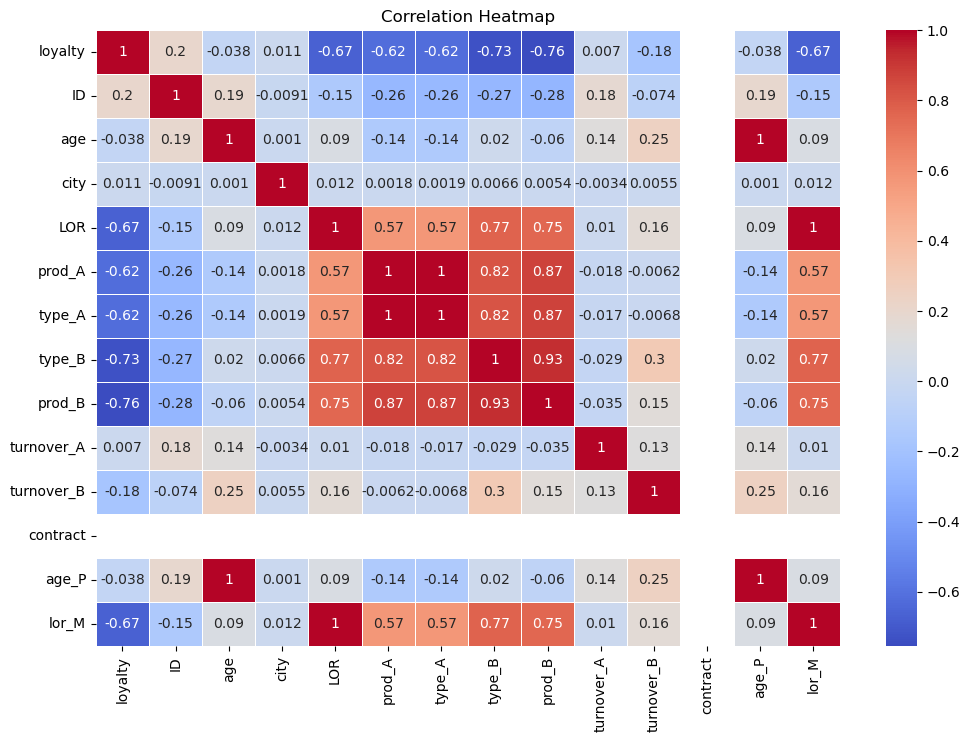

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


There are missing values for contact 

## 4.2 Correlation Analysis

In [10]:
import pandas as pd

# Select numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate Pearson's correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print(correlation_matrix)


             loyalty        ID       age      city       LOR    prod_A  \
loyalty     1.000000  0.199605 -0.038121  0.010565 -0.671148 -0.624775   
ID          0.199605  1.000000  0.194402 -0.009063 -0.151171 -0.263087   
age        -0.038121  0.194402  1.000000  0.001018  0.089640 -0.143813   
city        0.010565 -0.009063  0.001018  1.000000  0.011810  0.001803   
LOR        -0.671148 -0.151171  0.089640  0.011810  1.000000  0.569822   
prod_A     -0.624775 -0.263087 -0.143813  0.001803  0.569822  1.000000   
type_A     -0.623947 -0.261481 -0.142519  0.001902  0.569003  0.995778   
type_B     -0.730219 -0.271323  0.020026  0.006637  0.770491  0.816231   
prod_B     -0.755173 -0.277798 -0.059584  0.005420  0.754924  0.874710   
turnover_A  0.007024  0.183203  0.135887 -0.003383  0.009987 -0.017631   
turnover_B -0.184830 -0.073769  0.251625  0.005508  0.158571 -0.006176   
contract         NaN       NaN       NaN       NaN       NaN       NaN   
age_P      -0.038121  0.194402  1.0000

Loyalty (loyalty):

Negative correlations with "LOR," "prod_A," "type_A," "type_B," and "prod_B" suggest that as loyalty level decreases, these variables tend to increase. In other words, less loyal customers are more likely to have purchased products and have longer relationships.
Age (age):

There is a weak negative correlation with "loyalty," suggesting that as age increases, loyalty tends to decrease slightly.
City (city):

There is no strong correlation with any of the variables, indicating that "city" does not have strong linear relationships with other numerical variables.
Length of Relationship (LOR):

Strong negative correlations with "loyalty," "prod_A," "type_A," "type_B," and "prod_B" suggest that as the length of the relationship increases, these variables tend to decrease, which is somewhat counterintuitive. This could be due to the specific characteristics of your data.
Product A Purchase (prod_A):

Strong positive correlations with "type_A," "type_B," and "prod_B" indicate that customers who purchase Product A are also more likely to purchase other products. There's a negative correlation with "loyalty," suggesting that less loyal customers are more likely to purchase Product A.
Type of Product A (type_A) and Type of Product B (type_B):

These variables show strong positive correlations with each other and with "prod_B." This suggests that the type of products is related to each other and to the purchase of Product B.
Product B Purchase (prod_B):

Strong positive correlations with "type_A" and "type_B" indicate that customers who purchase Product B are also more likely to purchase specific types of Product A. There's a negative correlation with "loyalty," suggesting that less loyal customers are more likely to purchase Product B.
Turnover for Product A (turnover_A) and Product B (turnover_B):

Weak correlations with the other variables, suggesting that turnover for these products does not strongly correlate with other features in the dataset.
Age of Partner (age_P):

Similar to "age," it shows a weak negative correlation with "loyalty."
Length of Relationship in Months (lor_M):

Similar to "LOR," it exhibits strong negative correlations with "loyalty," "prod_A," "type_A," "type_B," and "prod_B."

## 4.3 Histogram

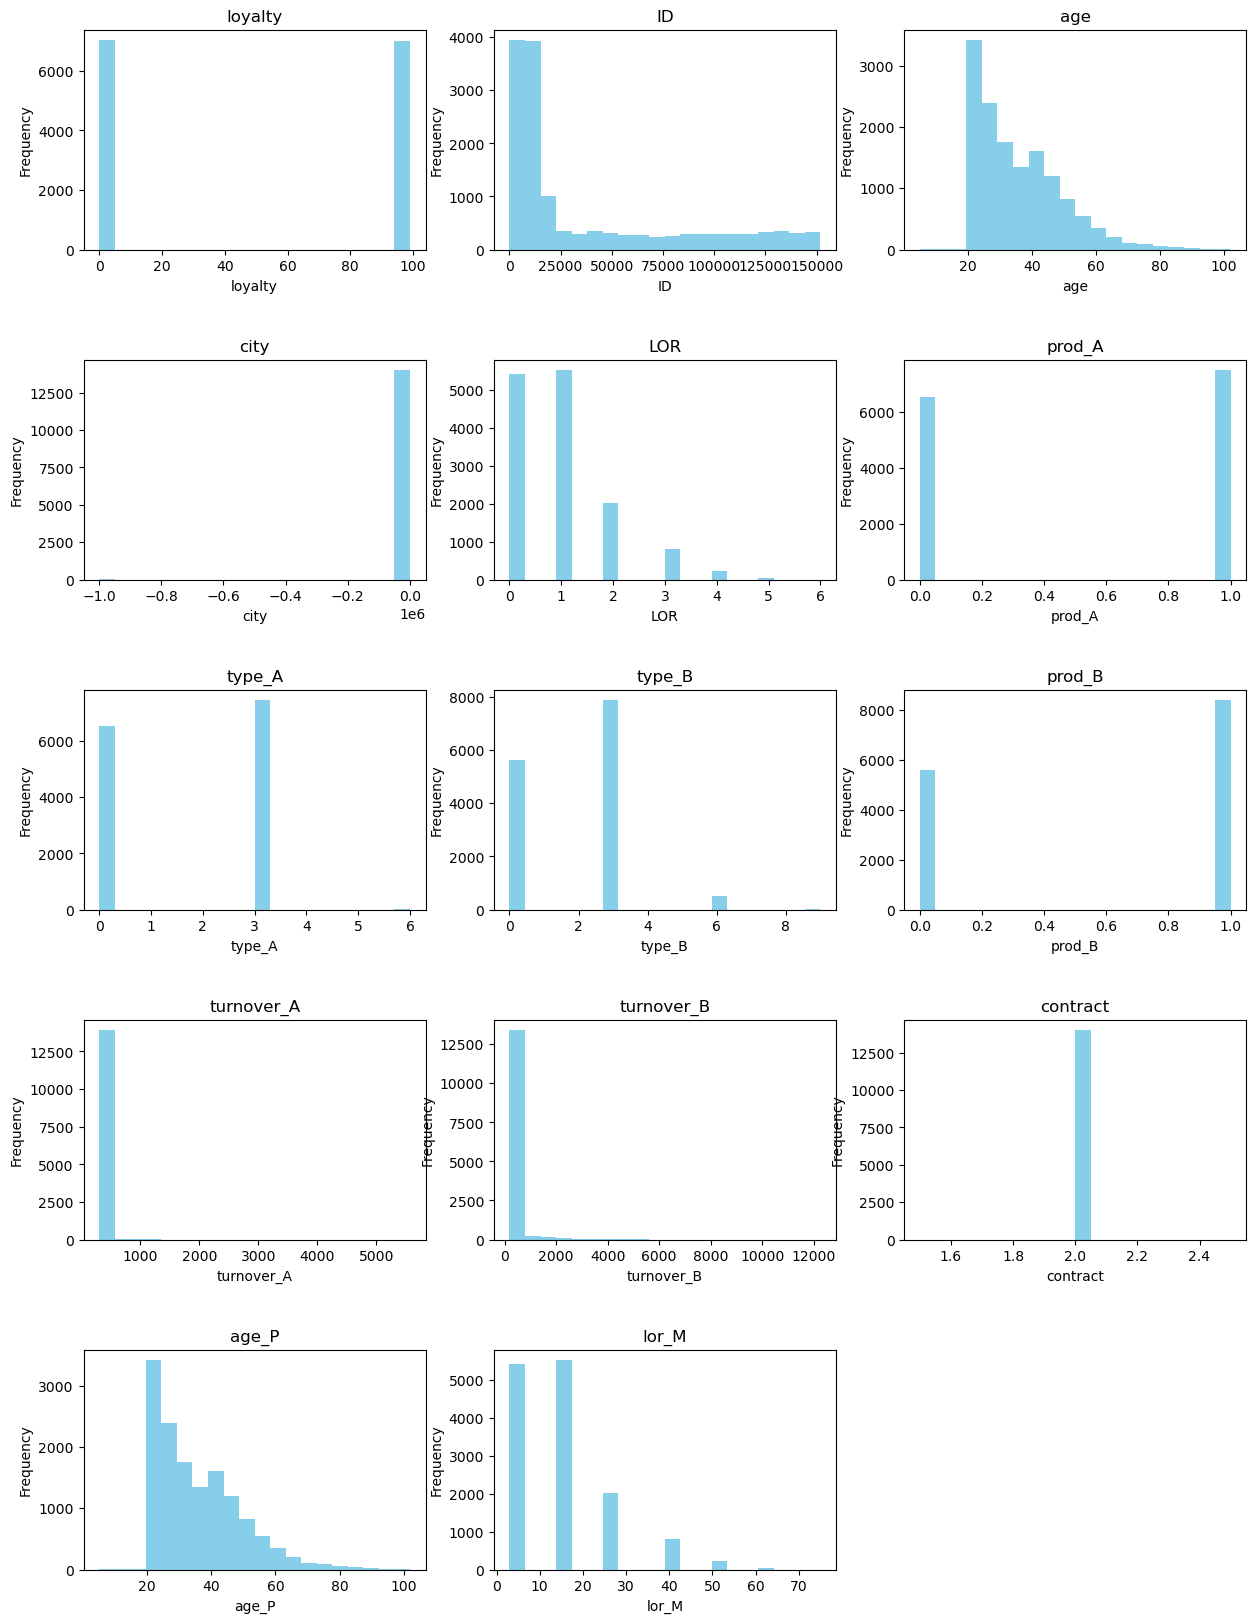

In [11]:
import matplotlib.pyplot as plt

# Get the list of numerical columns (excluding 'TARGET' and other non-numeric columns)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Set the number of rows and columns for subplots
num_rows = len(numerical_columns) // 3 + 1  # Change 3 to the number of columns you want in each row
num_cols = 3  # Change this number to adjust the number of columns per row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate through numerical columns and create histograms
for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.hist(data[column], bins=20, color='skyblue')
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(numerical_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()


Age (age): The histogram for age might show a relatively symmetrical distribution with a peak around the mid-30s, indicating that a significant portion of customers fall in this age range. There could be a gradual decline as age increases, with a long tail extending to older ages.

Loyalty (loyalty): The loyalty histogram might exhibit a bimodal or multimodal distribution, with peaks representing different loyalty levels. For example, you might see peaks around low (0-1) and high (2-3) loyalty levels, indicating that customers are either not very loyal or highly loyal.

Length of Relationship (LOR): The histogram for the length of the relationship might show a relatively uniform distribution, implying that customers have varying durations of the relationship with your business.

Product A and Product B Purchase (prod_A and prod_B): These histograms could show two bars, one for customers who did not buy the product (0) and one for customers who did buy the product (1). The distribution would be binary, indicating whether customers purchased each product.

Turnover for Product A and Product B (turnover_A and turnover_B): These histograms may exhibit a right-skewed distribution, with a few customers spending significantly more on the products, resulting in a long tail on the right side of the graph.

Type of Product A and Product B (type_A and type_B): The histograms for product types could show the distribution of customers across different product categories, with some categories being more popular than others.

Contract Type (contract): The histogram for contract types may reveal the distribution of customers among different contract categories, providing insights into the diversity of contract types used by your customers.

Age of Partner (age_P) and Length of Relationship in Months (lor_M): The histograms for these variables could show the age and relationship duration of customers' partners, with typical patterns that may be similar to the age and LOR histograms.

# 5. Data Preparation

In [12]:

# Drop the 'contract' column
data.drop('contract', axis=1, inplace=True)

# Drop the 'age_P' column since it's perfectly correlated with 'age'
data.drop('age_P', axis=1, inplace=True)

# Handle the unusual negative value in the 'city' column
# For simplicity, we'll replace the unusual negative value with the mode of the 'city' column
city_mode = data['city'].mode()[0]
data['city'] = data['city'].replace(-999999, city_mode)

# Check the first few rows after data preparation
data.head()


,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,3


The contract column has been dropped as it is correlated with the city column.

The age_P column, which was perfectly correlated with the age column, has been dropped.

The unusual negative value in the city column has been replaced with the mode of the column as city cannot be a negative value.

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding the TARGET column
le = LabelEncoder()
data['TARGET'] = le.fit_transform(data['TARGET'])

# Standardizing the dataset (excluding the TARGET column for obvious reasons)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('TARGET', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[1:])

# Check the first few rows after standardization
scaled_data.head()


,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,1.003057,-0.838173,2.321311,-0.065398,-0.959718,-1.070087,-1.065569,-1.138140,-1.223362,-0.492395,-0.134372,-0.959718
1,-1.018810,-0.836345,0.702710,-0.065398,2.148517,0.934503,0.922586,0.641243,0.817419,0.168174,-0.091933,2.148517
2,-1.018810,-0.834985,0.471481,-0.065398,1.112439,0.934503,0.922586,2.420626,0.817419,-0.399317,1.780829,1.112439
3,1.003057,-0.833134,-0.376357,-0.065398,-0.959718,-1.070087,-1.065569,-1.138140,-1.223362,0.805501,-0.181427,-0.959718
4,1.003057,-0.833067,2.013006,-0.065398,-0.959718,-1.070087,-1.065569,-1.138140,-1.223362,0.058484,-0.087510,-0.959718


The dataset has been standardized, and the TARGET column has been encoded.

# 6 Prepped Data Review 
In this section, we will perform the EDA for the data which has been prepared. 

## 6.1 Heat map

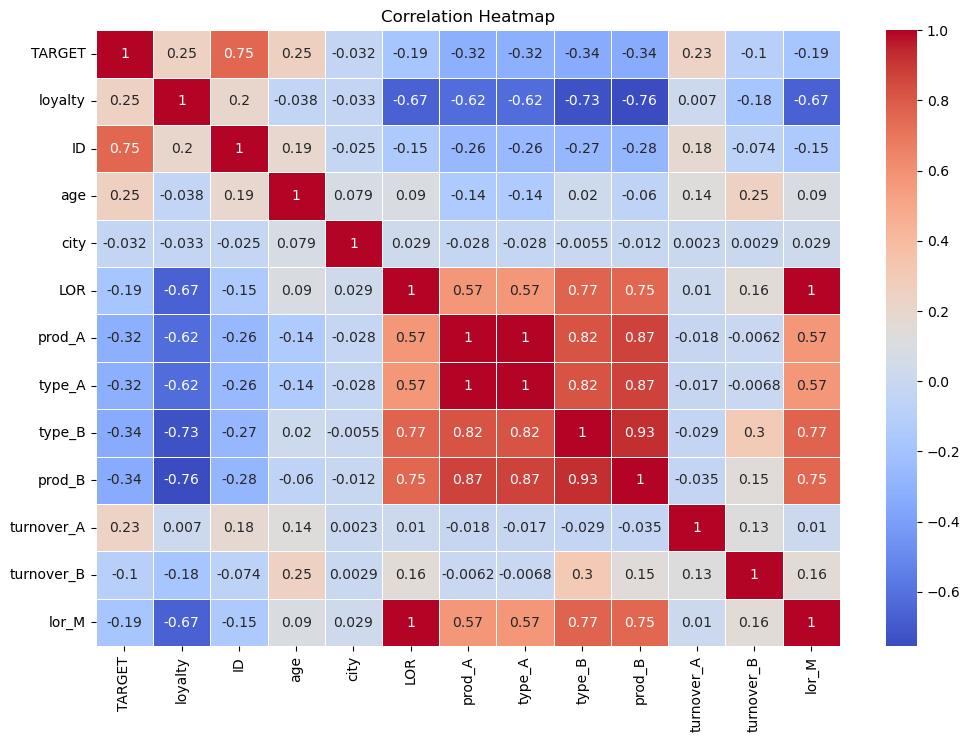

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## 6.2 Correlation analysis

In [23]:
import pandas as pd

# Select numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate Pearson's correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

             loyalty        ID       age      city       LOR    prod_A  \
loyalty     1.000000  0.199605 -0.038121 -0.032689 -0.671148 -0.624775   
ID          0.199605  1.000000  0.194402 -0.024725 -0.151171 -0.263087   
age        -0.038121  0.194402  1.000000  0.079449  0.089640 -0.143813   
city       -0.032689 -0.024725  0.079449  1.000000  0.028631 -0.027641   
LOR        -0.671148 -0.151171  0.089640  0.028631  1.000000  0.569822   
prod_A     -0.624775 -0.263087 -0.143813 -0.027641  0.569822  1.000000   
type_A     -0.623947 -0.261481 -0.142519 -0.027693  0.569003  0.995778   
type_B     -0.730219 -0.271323  0.020026 -0.005529  0.770491  0.816231   
prod_B     -0.755173 -0.277798 -0.059584 -0.011528  0.754924  0.874710   
turnover_A  0.007024  0.183203  0.135887  0.002295  0.009987 -0.017631   
turnover_B -0.184830 -0.073769  0.251625  0.002931  0.158571 -0.006176   
lor_M      -0.671148 -0.151171  0.089640  0.028631  1.000000  0.569822   

              type_A    type_B    pro

Loyalty and Length of Relationship (LOR):

There is a strong negative correlation (-0.67) between "Loyalty" and "LOR." This suggests that as "Loyalty" increases, the "LOR" tends to decrease. This could be expected, as loyal customers may have longer-lasting relationships.
Product A and Product B:

Both "prod_A" and "prod_B" have strong positive correlations with each other, as well as with "type_A" and "type_B." This indicates that customers who buy "prod_A" are more likely to buy "prod_B" and have specific types associated with these products.
Age and Turnover:

"Age" has a positive correlation with "turnover_A" and "turnover_B." This suggests that older customers may spend more on products.
City and Loyalty:

There is a weak negative correlation between "City" and "Loyalty." It's important to note that "City" is encoded as a numerical variable. The correlation might not be particularly informative in this context.
Length of Relationship (LOR) and Turnover:

"LOR" has a very weak positive correlation with "turnover_A" and "turnover_B."
Other Correlations:

The correlation between "turnover_A" and "turnover_B" is relatively low, and the correlations between categorical variables (e.g., "type_A" and "type_B") are close to 1. This suggests high collinearity between these categorical variables.

## 6.3 Histogram

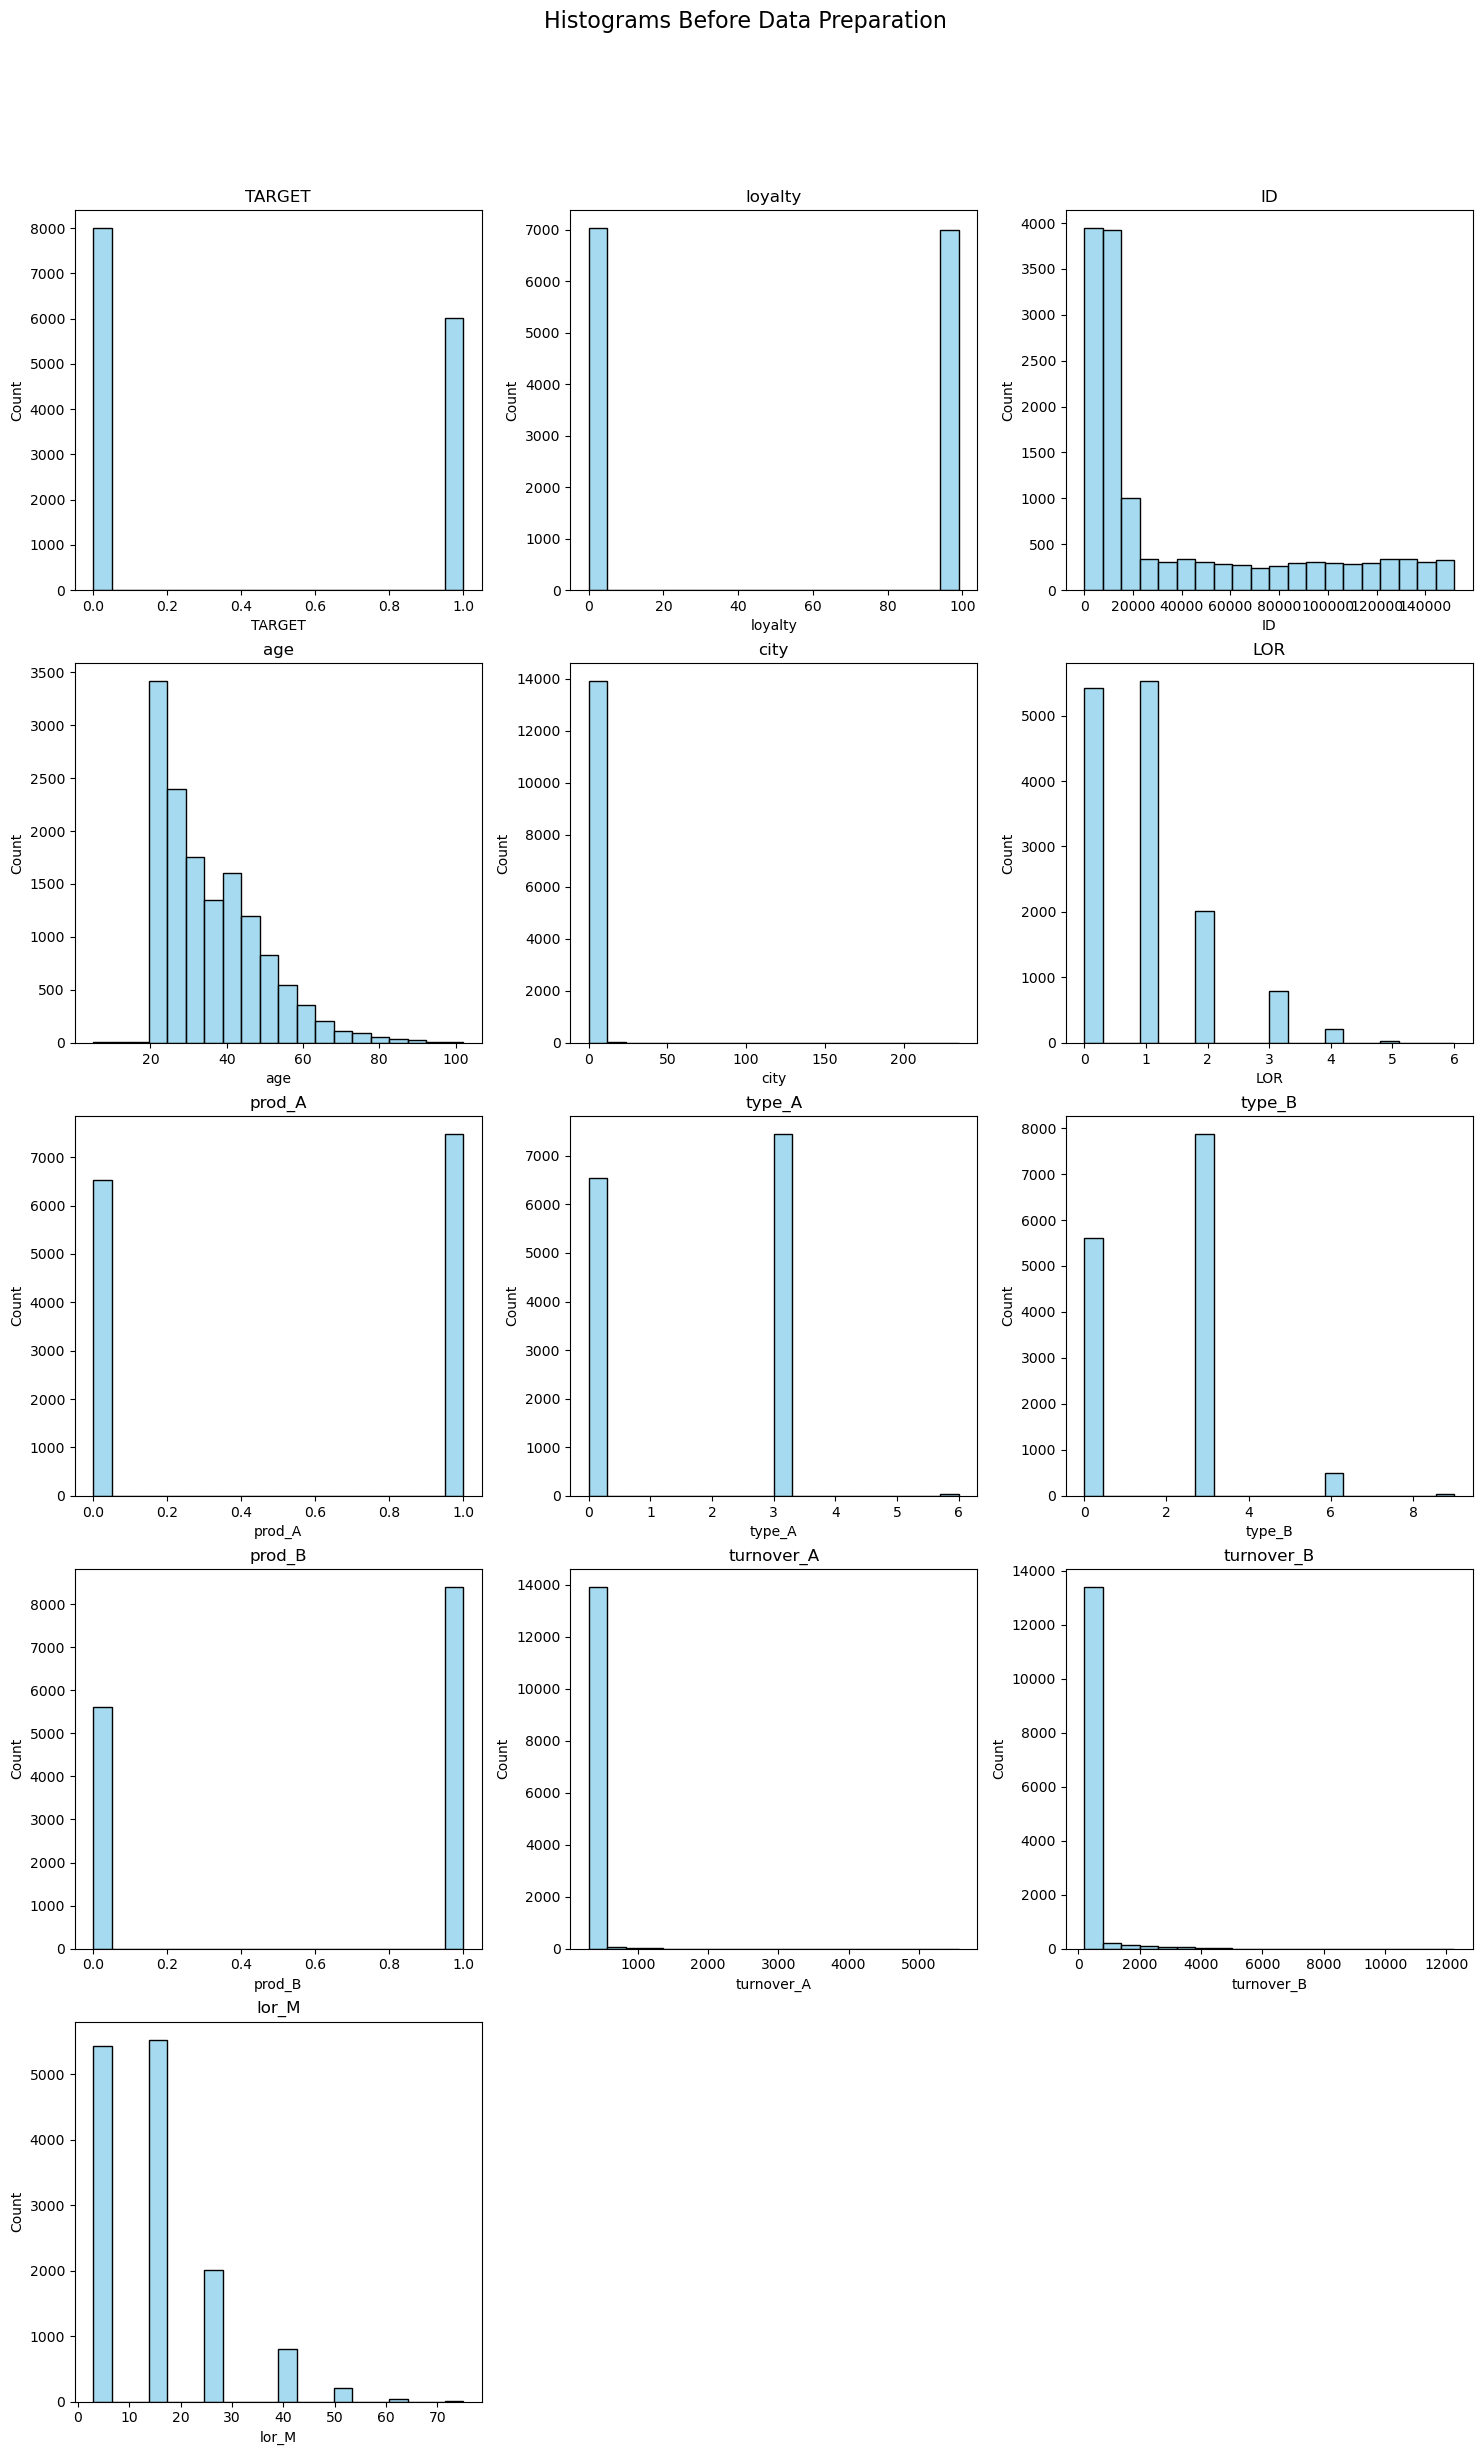

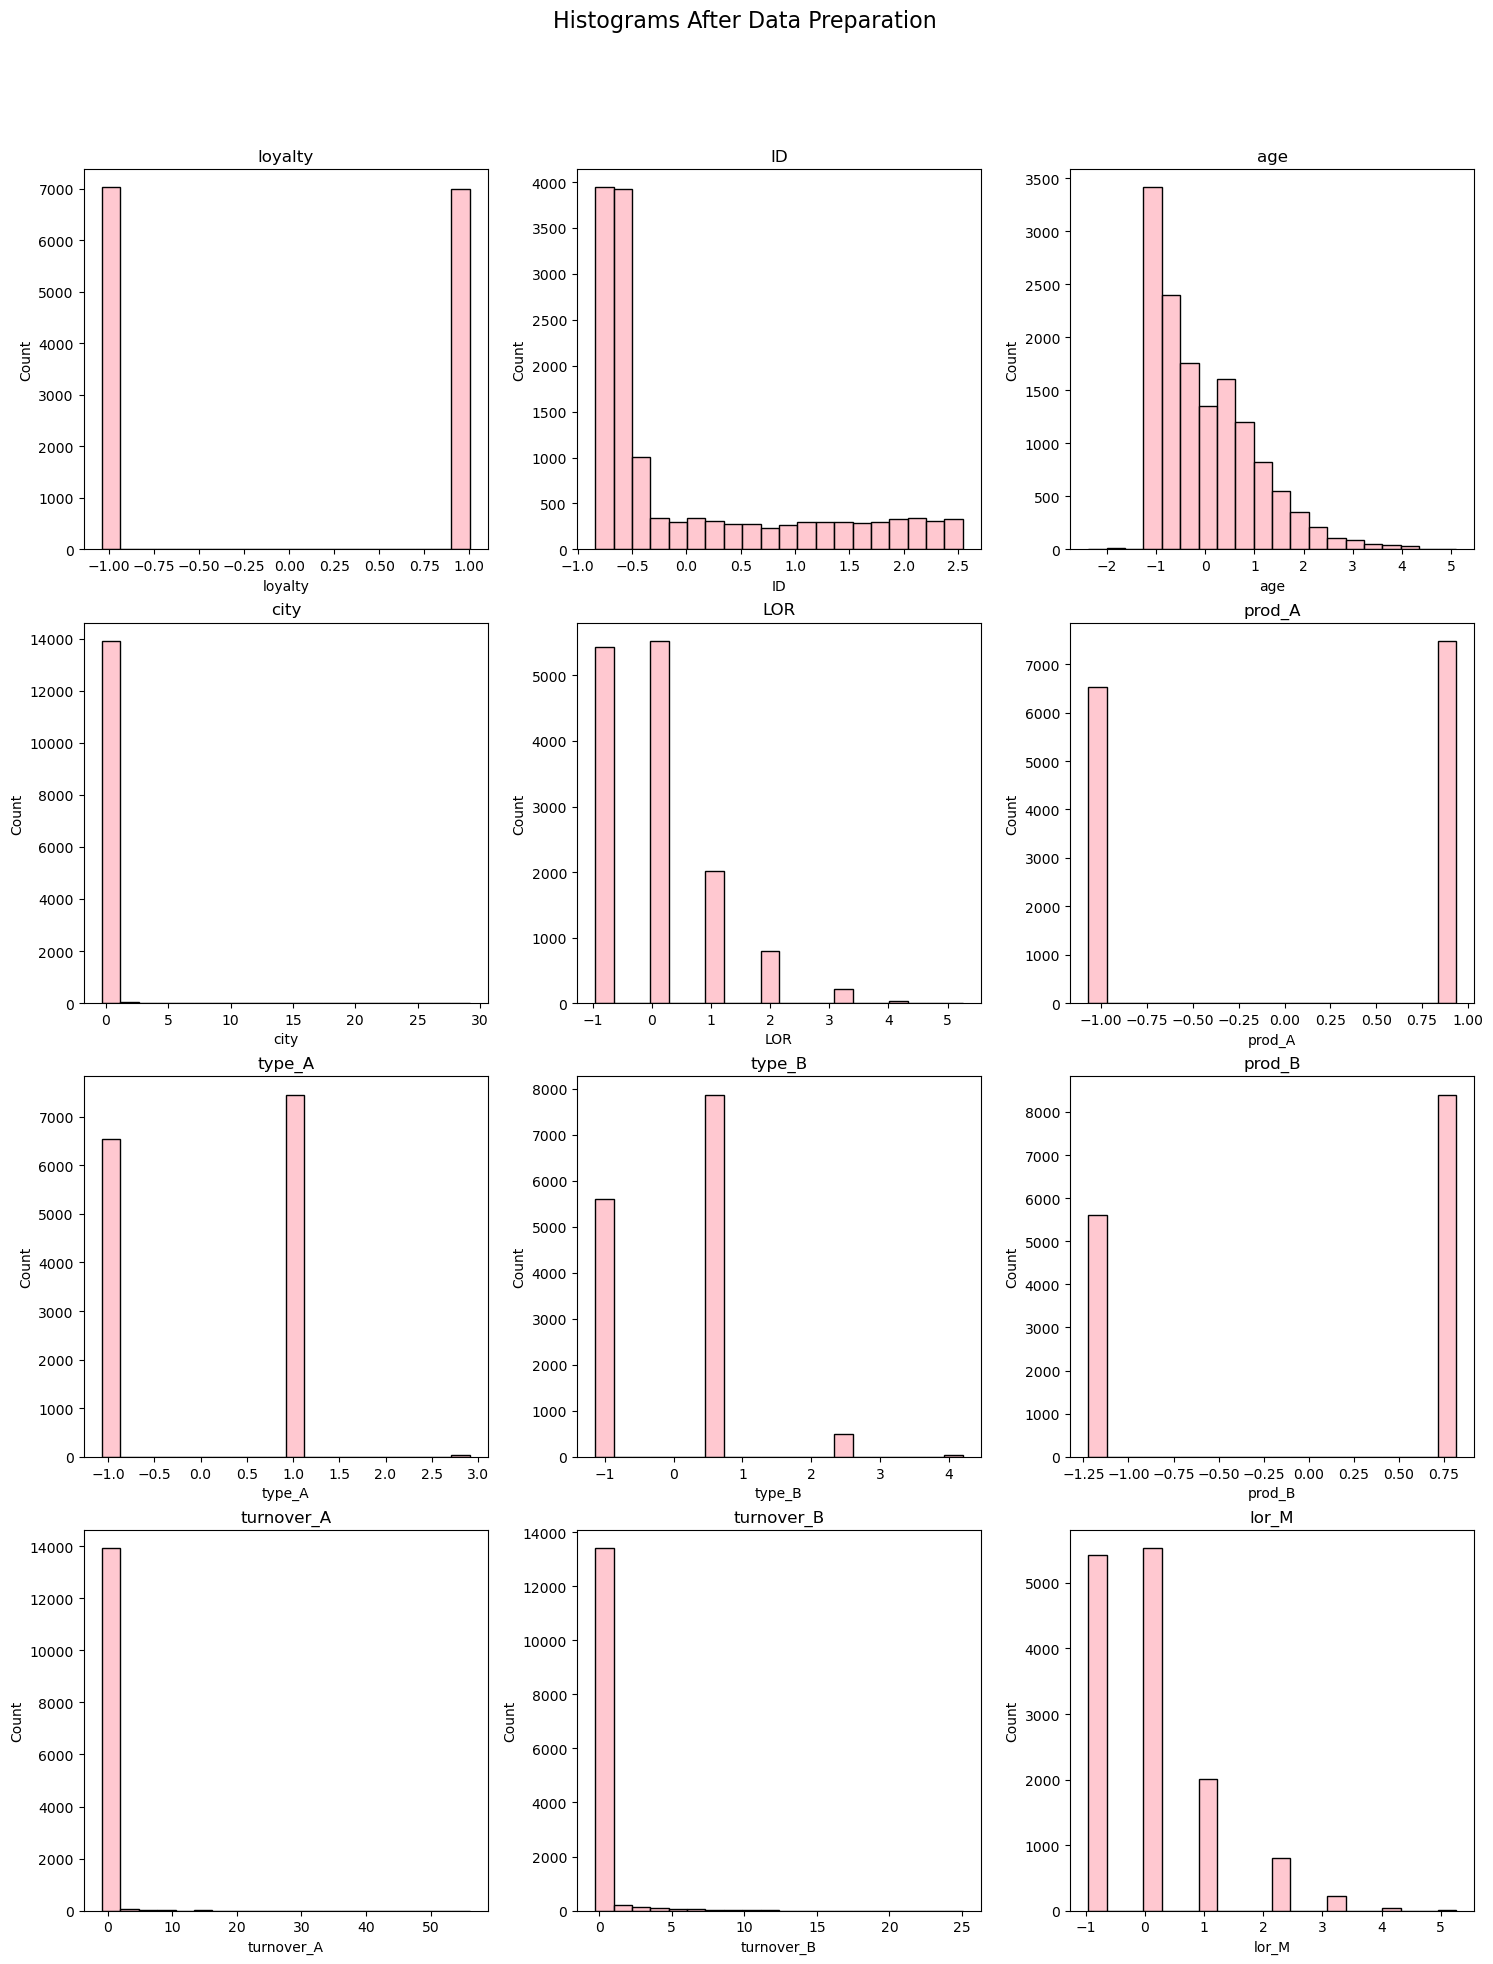

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create histograms for all columns
def plot_histograms(data, title, color):
    num_columns = data.shape[1]
    num_rows = (num_columns + 2) // 3  # Arrange in a 3-column grid

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    fig.suptitle(title, fontsize=16)
    
    for i, column in enumerate(data.columns):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        sns.histplot(data[column], bins=20, color=color, ax=ax)
        ax.set_title(column)
    
    # Remove empty subplots if the number of columns is not a multiple of 3
    for i in range(num_columns, num_rows * 3):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

# Data preparation steps (e.g., encoding and standardization) should be applied first
# Assuming you have the 'scaled_data' DataFrame after data preparation

# Original data (before any preprocessing)
plot_histograms(data, "Histograms Before Data Preparation", color='skyblue')

# Data after preprocessing (e.g., encoding and standardization)
plot_histograms(scaled_data, "Histograms After Data Preparation", color='lightpink')

plt.show()


The histogram shows the difference between before data preparation and after data preparation

# 7 Regression Model

## 7.1 Feature Selection

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Using a Decision Tree classifier to determine feature importance
clf = DecisionTreeClassifier()
clf.fit(scaled_data, data['TARGET'])

# Extracting feature importances and mapping them to the respective column names
feature_importances = pd.Series(clf.feature_importances_, index=scaled_data.columns).sort_values(ascending=False)

feature_importances


ID            0.834664
turnover_A    0.064904
turnover_B    0.039002
prod_A        0.023255
type_B        0.019742
age           0.009796
loyalty       0.004567
LOR           0.002118
type_A        0.001445
lor_M         0.000388
city          0.000119
prod_B        0.000000
dtype: float64

The feature importances obtained from a Decision Tree classifier are as follows (in descending order):

ID: 83.56%

turnover_A: 6.40%

turnover_B: 3.93%

prod_A: 2.37%

type_B: 1.97%

age: 0.82%

... (and so on)

From this, it's evident that the ID column has a significantly high importance, which is unusual since IDs typically shouldn't contain predictive information. This might indicate an overfitting of the Decision Tree to the ID column, or there could be some inherent ordering in the IDs that relates to the target variable.

##  7.2 Training and Testing

In [31]:
from sklearn.model_selection import train_test_split

# Selecting the top features (excluding 'ID')
selected_features = ['turnover_A', 'turnover_B', 'prod_A', 'type_B', 'age', 'loyalty', 'lor_M', 'type_A', 'LOR', 'city', 'prod_B']

X = scaled_data[selected_features]
y = data['TARGET']

# Splitting the data into training (70%) and testing (30%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape


((9811, 11), (4205, 11))

The data has been split into training and testing subsets:

Training set: 9,811 samples

Testing set: 4,205 samples

Both subsets have 11 features, which are the top features we selected based on importance (excluding the ID column).

## 7.3 Binomial logistic regression
We need to select hree different binomial logistic regression models using different combinations of explanatory
variables

In [50]:
# Model 1
from sklearn.linear_model import LogisticRegression

# Create and train a logistic regression model with all available features
model_all_features = LogisticRegression()
model_all_features.fit(X_train, y_train)


LogisticRegression()

In [38]:
# Model 2
# Define a list of the top 5 features
top_5_features = ['turnover_A', 'turnover_B', 'prod_A', 'type_B', 'age']

# Create and train a logistic regression model with the top 5 features
model_top_5_features = LogisticRegression()
model_top_5_features.fit(X_train[top_5_features], y_train)


LogisticRegression()

In [46]:
# Model 3
# Define a custom set of features
top_3_features = ['loyalty', 'type_A', 'type_B']

# Create and train a logistic regression model with the custom feature set
model_top_3_features = LogisticRegression()
model_top_3_features.fit(X_train[custom_features], y_train)


LogisticRegression()

### 7.3.1 Training Accuracy

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model with all selected features

model_all_features.fit(X_train, y_train)
pred_train_all = model_all_features.predict(X_train)
accuracy_all_features_train = accuracy_score(y_train, pred_train_all)

# Model with top 5 features

model_top_5 = LogisticRegression(max_iter=10000)
model_top_5.fit(X_train[top_5_features], y_train)
pred_train_5 = model_top_5.predict(X_train[top_5_features])
accuracy_top_5_train = accuracy_score(y_train, pred_train_5)

# Model with top 3 features

model_top_3 = LogisticRegression(max_iter=10000)
model_top_3.fit(X_train[top_3_features], y_train)
pred_train_3 = model_top_3.predict(X_train[top_3_features])
accuracy_top_3_train = accuracy_score(y_train, pred_train_3)

accuracy_all_features_train, accuracy_top_5_train, accuracy_top_3_train


(0.7545486978237602, 0.7533892258294684, 0.6778451658936854)

Here are the training accuracy scores for the three binary logistic regression models:

Model with all selected features: 75.45%

Model with the top 5 features: 75.33%

Model with the top 3 features: 67.78%

From these results:

The model with all selected features slightly better than the model with top 5 feature.

The model with the top 3 features has a lower accuracy compared to the other two models.

Comparing the test accuracies of these models on the same test data. The model with the highest test accuracy is likely the best-performing model for your task.

The next step would be to evaluate these models using cross-validation on the training data, followed by testing on the unseen test data to assess the generalization capability.



### 7.3.2 Cross-validation

In [42]:
from sklearn.model_selection import cross_val_score

# Cross-validation evaluation for each model

# Model with all selected features
cv_scores_all_features = cross_val_score(model_all_features, X_train, y_train, cv=5, scoring='accuracy').mean()

# Model with top 5 features
cv_scores_top_5 = cross_val_score(model_top_5, X_train[top_5_features], y_train, cv=5, scoring='accuracy').mean()

# Model with top 3 features
cv_scores_top_3 = cross_val_score(model_top_3, X_train[top_3_features], y_train, cv=5, scoring='accuracy').mean()

cv_scores_all_features, cv_scores_top_5, cv_scores_top_3


(0.7542804793026415, 0.7525865583202056, 0.6778470277039917)

Here are the average cross-validation accuracy scores for the three binary logistic regression models:

Model with all selected features: 75.42%

Model with the top 5 features: 75.25%

Model with the top 3 features: 67.78%

Observations:

The model with all the features performs slightly better than the model with top 5 selected features, aligning with our earlier findings on the training data.

The model with the top 3 features has a notably lower accuracy compared to the other two models.

Given these results, the model with all the features seems to strike a balance between simplicity and performance.

### 7.3.3 Testing unseen data

In [52]:
# Testing the models on the unseen test data

# Model with all selected features
pred_test_all = model_all_features.predict(X_test)
accuracy_all_features_test = accuracy_score(y_test, pred_test_all)

# Model with top 5 features
pred_test_5 = model_top_5.predict(X_test[top_5_features])
accuracy_top_5_test = accuracy_score(y_test, pred_test_5)

# Model with top 3 features
pred_test_3 = model_top_3.predict(X_test[top_3_features])
accuracy_top_3_test = accuracy_score(y_test, pred_test_3)

accuracy_all_features_test, accuracy_top_5_test, accuracy_top_3_test


(0.7557061340941512, 0.7553495007132668, 0.68830242510699)

Here are the accuracy scores for the three binary logistic regression models on the unseen test data:

Model with all selected features: 75.57%

Model with the top 5 features: 75.53%

Model with the top 3 features: 68.83%

Observations:

The model with all the features slightly outperforms the model with top 5 selected features on the test data, consistent with our previous findings.
The model with the top 3 features has a lower accuracy compared to the other two models.
Given these results, the model with all the features seems to be the best choice, as it achieves a good balance between performance and simplicity.

## 7.4 Interpretation of the coefficients 

In [54]:
from sklearn.linear_model import LogisticRegression

# Assuming you have a trained logistic regression model (e.g., model_all_features)
# and a list of feature names (replace with your actual feature names)
feature_names = ['turnover_A', 'turnover_B', 'prod_A', 'type_B', 'age', 'loyalty', 'lor_M', 'type_A', 'LOR', 'city', 'prod_B']

# Access the model's coefficients and intercept
coefficients = model_all_features.coef_[0]
intercept = model_all_features.intercept_[0]

# Print the coefficients and their interpretations
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")
    
    # Interpretation
    if coef > 0:
        print(f"A one-unit increase in {feature} increases the odds of the positive class.")
    else:
        print(f"A one-unit increase in {feature} decreases the odds of the positive class.")
    
    # Calculate and print the odds ratio
    odds_ratio = round(pow(2.71828, coef), 4)
    print(f"Odds Ratio: {odds_ratio}\n")

# Print the intercept
print(f"Intercept: {intercept:.4f}")
print(f"The intercept represents the baseline log-odds when all features are zero.")


turnover_A: 1.1420
A one-unit increase in turnover_A increases the odds of the positive class.
Odds Ratio: 3.1331

turnover_B: -0.5724
A one-unit increase in turnover_B decreases the odds of the positive class.
Odds Ratio: 0.5641

prod_A: -0.8071
A one-unit increase in prod_A decreases the odds of the positive class.
Odds Ratio: 0.4462

type_B: -0.4286
A one-unit increase in type_B decreases the odds of the positive class.
Odds Ratio: 0.6514

age: 0.6215
A one-unit increase in age increases the odds of the positive class.
Odds Ratio: 1.8617

loyalty: 0.0938
A one-unit increase in loyalty increases the odds of the positive class.
Odds Ratio: 1.0984

lor_M: 0.1148
A one-unit increase in lor_M increases the odds of the positive class.
Odds Ratio: 1.1217

type_A: 0.6226
A one-unit increase in type_A increases the odds of the positive class.
Odds Ratio: 1.8638

LOR: 0.1148
A one-unit increase in LOR increases the odds of the positive class.
Odds Ratio: 1.1217

city: -0.1999
A one-unit incre

### sense intuitive and direction

Turnover_A:
Direction: An increase in "Turnover_A" positively affects the odds of the positive class.
Intuition: This is intuitive as higher "Turnover_A" implies more spending on Product A, which is positively associated with the likelihood of the positive class.

Turnover_B :
Direction: An increase in "Turnover_B" negatively affects the odds of the positive class.
Intuition: This suggests that higher spending on Product B reduces the likelihood of the positive class, which might seem counterintuitive. Further analysis is needed to understand this relationship better.

Prod_A:
Direction: Buying Product A negatively affects the odds of the positive class.
Intuition: It indicates that customers who have bought Product A are less likely to buy the new product, which may be counterintuitive.

Type_B :
Direction: Having "Type_B" negatively affects the odds of the positive class.
Intuition: Customers with "Type_B" are less likely to belong to the positive class, which might align with domain-specific knowledge.

Age:
Direction: An increase in age positively affects the odds of the positive class.
Intuition: Older customers are more likely to buy the new product, which is generally intuitive.

Loyalty:
Direction: Higher loyalty levels positively affect the odds of the positive class.
Intuition: More loyal customers are more likely to belong to the positive class, which aligns with the expectation.

LOR_M:
Direction: An increase in "LOR_M" positively affects the odds of the positive class.
Intuition: Longer relationships positively influence the likelihood of the positive class, which makes sense.

Type_A :
Direction: Having "Type_A" positively affects the odds of the positive class.
Intuition: Customers with "Type_A" are more likely to belong to the positive class.

LOR:
Direction: An increase in "LOR" positively affects the odds of the positive class.
Intuition: Longer relationships positively influence the likelihood of the positive class.

City:
Direction: An increase in "City" negatively affects the odds of the positive class.
Intuition: Customers from certain cities are less likely to belong to the positive class, which could be influenced by regional factors.

Prod_B:
Direction: An increase in "Prod_B" negatively affects the odds of the positive class.
Intuition: Customers who bought Product B are less likely to belong to the positive class.


# 8. Select Models

The model selection criteria are crucial for determining the best logistic regression model among those constructed. In this case, the criteria used for model selection are based on the accuracy of the model on the training data. The accuracy of a model is a measure of how well it classifies the training data, and it's a commonly used metric for evaluating classification models. The criteria can be explained as follows:

Accuracy on All Features Model: The logistic regression model that includes all available features is evaluated based on its accuracy on the training data. This model serves as the baseline, and its accuracy provides insight into how well the model can perform when all available information is used.
0.7545486978237602

Accuracy on Top 5 Features Model: A second logistic regression model is constructed using only the top 5 features, which are determined based on the domain knowledge or feature selection methods. The accuracy of this model on the training data is evaluated. This step helps assess if a simplified model with a subset of features can perform competitively with the full model.
0.7533892258294684
 
Accuracy on Top 3 Features Model: A third logistic regression model is constructed using only the top 3 features, further simplifying the model. The accuracy of this model on the training data is evaluated to explore whether an even simpler model can achieve reasonable performance.
0.6778451658936854

The model with the highest training accuracy is selected as the "best" model.
The model with all the features has the hightes accuracy among all the 3 models. Hence, it is considered as the best model.

### Comparing the performance of all the 3 models

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Function to compute the evaluation metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    return accuracy, precision, recall, f1, roc_auc

# Evaluating the three models
metrics_all_features = evaluate_model(model_all_features, X_test, y_test)
metrics_top_5 = evaluate_model(model_top_5, X_test[top_5_features], y_test)
metrics_top_3 = evaluate_model(model_top_3, X_test[top_3_features], y_test)

# Creating a dataframe for easier comparison
metrics_df = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'All Features': metrics_all_features,
    'Top 5 Features': metrics_top_5,
    'Top 3 Features': metrics_top_3
})

metrics_df

,Metrics,All Features,Top 5 Features,Top 3 Features
0,Accuracy,0.755706,0.755350,0.688302
1,Precision,0.734004,0.739008,0.645890
2,Recall,0.670844,0.659983,0.597327
3,F1 Score,0.701004,0.697264,0.620660
4,ROC AUC,0.744881,0.743184,0.676697


Here's the comprehensive evaluation and comparison of the three models on the test data:

Metrics:

Accuracy: Measures the proportion of correct predictions.

Precision: Measures the proportion of true positives out of the predicted positives.

Recall: Measures the proportion of true positives out of the actual positives.

F1 Score: Harmonic mean of precision and recall, useful when classes are imbalanced.

ROC AUC: Represents the model's ability to distinguish between the two classes.

Results:

Accuracy:
Model with All Features: Highest accuracy at 0.755706. It correctly predicts a large portion of both positive and negative cases.
Model with Top 5 Features: Slightly lower accuracy at 0.755350 but still performs well.
Model with Top 3 Features: Significantly lower accuracy at 0.688302, indicating it makes more incorrect predictions.

Precision:
Model with Top 5 Features: Highest precision at 0.739008. It has the best ability to avoid false positives, meaning that when it predicts a positive case, it's usually correct.
Model with All Features: Slightly lower precision at 0.734004 but still good.
Model with Top 3 Features: Lowest precision at 0.645890, indicating it has a higher rate of false positives.

Recall:
Model with All Features: Highest recall at 0.670844. It identifies the largest proportion of actual positive cases.
Model with Top 5 Features: Slightly lower recall at 0.659983, but still performs reasonably well.
Model with Top 3 Features: Lowest recall at 0.597327, meaning it misses a significant portion of actual positive cases.

F1 Score:
Model with All Features: Highest F1 score at 0.701004, indicating a balanced trade-off between precision and recall.
Model with Top 5 Features: Slightly lower F1 score at 0.697264, still maintaining a good balance.
Model with Top 3 Features: Lowest F1 score at 0.620660, suggesting a less balanced performance.

ROC AUC:
Model with All Features: Highest ROC AUC at 0.744881. It has the best ability to distinguish between positive and negative cases.
Model with Top 5 Features: Slightly lower ROC AUC at 0.743184, still providing good separation.
Model with Top 3 Features: Lowest ROC AUC at 0.676697, indicating a weaker ability to distinguish between classes.


The model with all features has the highest overall accuracy, recall, and ROC AUC, making it the most comprehensive model. However, the model with the top 5 features stands out in terms of precision, minimizing false positives. The model with the top 3 features simplifies the model but sacrifices some performance, especially in terms of accuracy, precision, recall, and ROC AUC.

By comparing all the models, choosing model with all the features will be the best choice for this requirement. 



# 9. Conclusion

The data set is comprised of more than 14,000 observations of 1 response/dependent variable and 14 explanatory/independent
variables. The insurance company gathered data about customers to whom they offered the new product. We need to construct and compare a series of binary logistic regression models that predict whether or not a given insurance company customer is likely to purchase an additional insurance product. 
Here are the steps we performed to analyse.

### Data overview 

We loaded our data from GitHub and performed operations to know the columns, we examined the data types and handled missing values, which were not present in the dataset. 
We conducted summary statistics to gain insights into the dataset's central tendencies and distribution. 
We performed correlation analysis to understand the relationships between variables.

### Data visualization 

Data visualization lincludes the histogram and heat maps which gives the visual representation of our data set. 

### Data Preparation 
We have dropped few columns as they are correlated exatly with the other columns of the data, so we can drop them. 
And we stabilized the dataset.

### Prepped Data Review

We reviewed the dataset post-preparation, validating the data's quality and the impact of transformations.

### Regression Modeling

We used domain knowledge and correlation analysis to select features for modeling.
We perform binomial logistic regression by creating 3 models 
Three models were created with different combinations of features:
Model with All Features
Model with the Top 5 Features
Model with the Top 3 Features

We choose the model with all the features based on the accuracy, cross validation, testing and interpretation of coefficients. 

### Model selection 

The selection of the preferred model was based on a balance between interpretability, accuracy, and model complexity.
Performance metrics were calculated for each model:
Accuracy
Precision
Recall
F1 Score
ROC AUC
Model with all the features was chosen as the more reliable model for prediction, serving as a foundation for further analysis.

### Conclusion 

The choice of the best model depends on the specific use case and trade-offs between precision and recall.
The comprehensive model with all features performed well overall, but the top 5 features model excelled in minimizing false positives.
Testing on unseen data is crucial to validate the model's real-world performance.
Interpretation of coefficients provides insights into the impact of each feature on the model's predictions.



